In [18]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%aimport nrrd_file

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from pathlib import Path

nrrds_dir = Path("/Users/lachlan/Code/nrrds2/")

In [25]:
nrrds_dir.ls()

AttributeError: 'PosixPath' object has no attribute 'ls'

In [55]:
# add ls method to pathlib.Path
def ls(self: Path):
    return sorted(list(self.iterdir()))

Path.ls = ls

In [57]:
nrrds_dir.ls()[:50]

[PosixPath('/Users/lachlan/Code/nrrds2/00128_02048_02048_volume.nrrd'),
 PosixPath('/Users/lachlan/Code/nrrds2/00128_02048_02176_volume.nrrd'),
 PosixPath('/Users/lachlan/Code/nrrds2/00128_02048_02304_volume.nrrd'),
 PosixPath('/Users/lachlan/Code/nrrds2/00128_02048_02432_volume.nrrd'),
 PosixPath('/Users/lachlan/Code/nrrds2/00128_02048_02560_volume.nrrd'),
 PosixPath('/Users/lachlan/Code/nrrds2/00128_02048_02688_volume.nrrd'),
 PosixPath('/Users/lachlan/Code/nrrds2/00128_02048_02816_volume.nrrd'),
 PosixPath('/Users/lachlan/Code/nrrds2/00128_02048_02944_volume.nrrd'),
 PosixPath('/Users/lachlan/Code/nrrds2/00128_02048_03072_volume.nrrd'),
 PosixPath('/Users/lachlan/Code/nrrds2/00128_02048_03200_volume.nrrd'),
 PosixPath('/Users/lachlan/Code/nrrds2/00128_02048_03328_volume.nrrd'),
 PosixPath('/Users/lachlan/Code/nrrds2/00128_02048_03456_volume.nrrd'),
 PosixPath('/Users/lachlan/Code/nrrds2/00128_02048_03584_volume.nrrd'),
 PosixPath('/Users/lachlan/Code/nrrds2/00128_02048_03712_volume.

In [71]:
def load_four(dir: Path|str, z_lower: int, y_lower: int, x_lower: int):
    ul = Nrrd.from_file(Path(dir)/f'{z_lower:05d}_{y_lower:05d}_{x_lower:05d}_volume.nrrd')
    y_step, x_step = ul.volume.shape[1:]
    bl = Nrrd.from_file(Path(dir)/f'{z_lower:05d}_{y_lower:05d}_{x_lower+x_step:05d}_volume.nrrd')
    ur = Nrrd.from_file(Path(dir)/f'{z_lower:05d}_{y_lower+y_step:05d}_{x_lower:05d}_volume.nrrd')
    br = Nrrd.from_file(Path(dir)/f'{z_lower:05d}_{y_lower+y_step:05d}_{x_lower+x_step:05d}_volume.nrrd')
    return ul, ur, bl, br

x_lower = 2304
y_lower = 2304

nrrds_folder = Path("/Users/lachlan/Code/nrrds2/")
ul, ur, bl, br = load_four(nrrds_folder, 128, 2304, 2304)



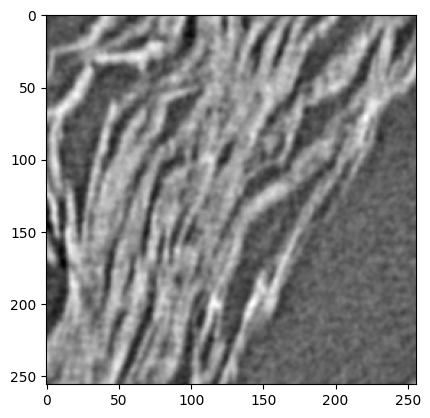

In [68]:
def combine_four_slices(z_slice: int, ul, ur, bl, br):
    yd, xd = ul.volume.shape[1:]
    if not 0 <= z_slice <= ul.volume.shape[0] - 1:
        raise ValueError("argument z_slice was outside range (0, ul.volume.shape[1] - 1")

    img = np.zeros((2 * yd, 2 * xd))
    img[:xd, :yd] = ul.volume[z_slice].T
    img[:xd, yd:] = ur.volume[z_slice].T
    img[xd:, :yd] = bl.volume[z_slice].T
    img[xd:, yd:] = br.volume[z_slice].T
    return img

img = combine_four_slices(127, ul, ur, bl, br)
plt.imshow(img, cmap='gray')

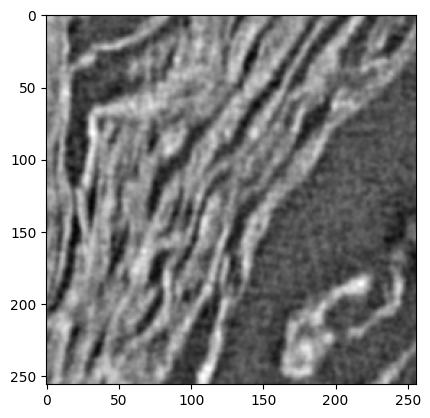

In [92]:
def show_four_axial(z: int, y: int, x: int, nrrds_dir: Path|str):
    ul, ur, bl, br = load_four(Path(nrrds_dir), z, y, x)
    img = combine_four_slices(int(ul.volume.shape[0]/2), ul, ur, bl, br)
    plt.imshow(img, cmap='gray')

show_four_axial(128, 2304, 2304, nrrds_folder)

In [73]:
ul.metadata

OrderedDict([('type', 'uint16'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([128, 128, 128])),
             ('space directions',
              array([[1., 0., 0.],
                     [0., 1., 0.],
                     [0., 0., 1.]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('endian', 'little'),
             ('encoding', 'gzip'),
             ('space origin', array([2304., 2304.,  128.]))])

## Viewing the slice to figure out what i've done wrong

In [74]:
from PIL import Image

In [126]:
slice_255 = Image.open("/Users/lachlan/Code/full_scrolls/Scroll1/PHercParis4.volpkg/volumes/20230901234823/255.tif")
slice_255 = np.array(slice_255)

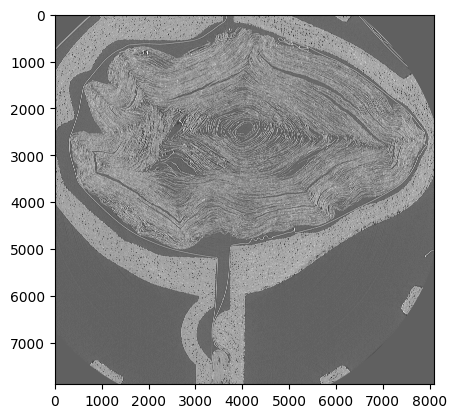

In [127]:
plt.imshow(slice_255, cmap='gray')

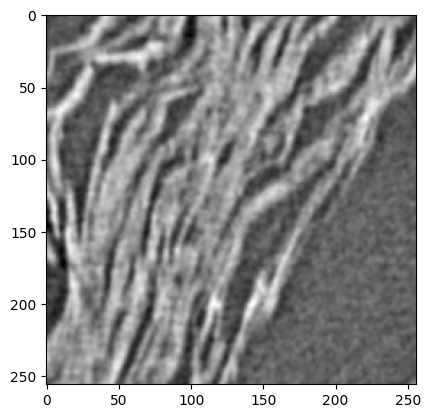

In [128]:
plt.imshow(slice_255[2304:2304+256, 2304:2304+256], cmap='gray')

## See if Nrrd.from_cube and tiff_to_nrrd produce the same kind of metatadata

In [84]:
from_tiff = Nrrd.from_file("/Users/lachlan/Code/nrrds2/00128_02176_02048_volume.nrrd")
from_vesuvius = Nrrd.from_file("/Users/lachlan/Code/nrrds/volumes/00000_02304_03840_volume.nrrd")

In [85]:
from_tiff.metadata

OrderedDict([('type', 'uint16'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([128, 128, 128])),
             ('space directions',
              array([[1., 0., 0.],
                     [0., 1., 0.],
                     [0., 0., 1.]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('endian', 'little'),
             ('encoding', 'gzip'),
             ('space origin', array([ 128., 2176., 2048.]))])

In [86]:
from_vesuvius.metadata

OrderedDict([('type', 'uint16'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([256, 256, 256])),
             ('space directions',
              array([[1., 0., 0.],
                     [0., 1., 0.],
                     [0., 0., 1.]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('endian', 'little'),
             ('encoding', 'gzip'),
             ('space origin', array([3840., 2304.,    0.]))])

Origins are transposed but they look correct, implying data is also transposed. Further implying that... ?

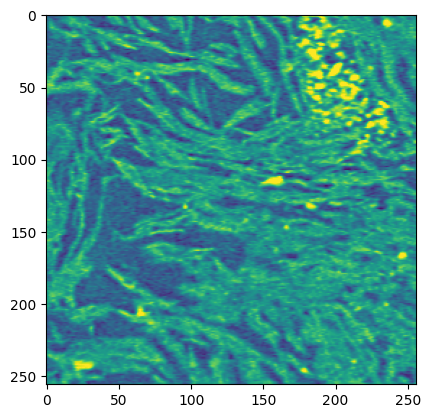

In [139]:
plt.imshow(from_vesuvius.volume[:, 0, :])

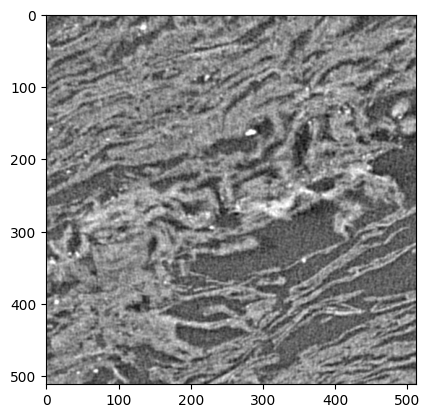

In [93]:
show_four_axial(0, 2048, 3072, "/Users/lachlan/Code/nrrds/volumes/")

In [111]:
from_vesuvius.metadata['space origin'] = from_vesuvius.metadata['space origin'][::-1]

In [112]:
from_vesuvius.write("/Users/lachlan/Code/c_ordered_00000_02304_03840_volume.nrrd", index_order="C")

In [98]:
from_vesuvius_2 = Nrrd.from_file("/Users/lachlan/Code/c_ordered_00000_02304_03840_volume.nrrd")

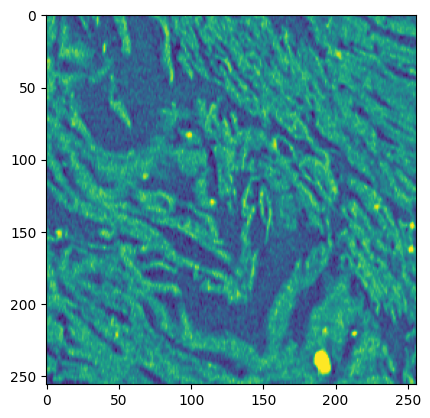

In [107]:
plt.imshow(from_vesuvius_2.volume[128])

In [108]:
from_vesuvius_2.metadata

OrderedDict([('type', 'uint16'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([256, 256, 256])),
             ('space directions',
              array([[1., 0., 0.],
                     [0., 1., 0.],
                     [0., 0., 1.]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('endian', 'little'),
             ('encoding', 'gzip'),
             ('space origin', array([3840., 2304.,    0.]))])

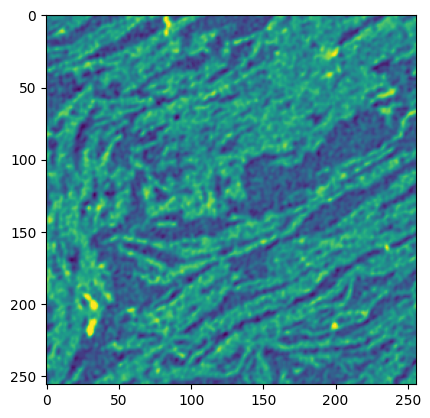

In [106]:
plt.imshow(from_vesuvius.volume[128,...].T)

In [116]:
import vesuvius

In [117]:
scroll1 = vesuvius.Volume("Scroll1")

In [118]:
img = scroll1[0,...]

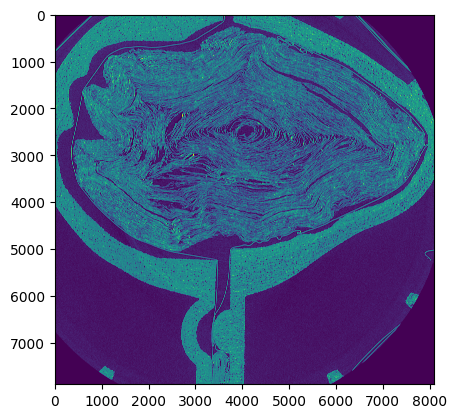

In [119]:
plt.imshow(img)

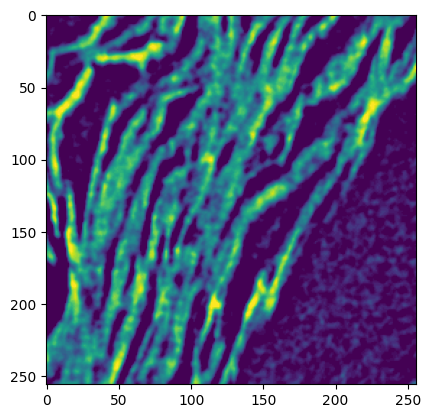

In [129]:
slice_255_2 = scroll1[255, 2304:2304+256, 2304:2304+256]
plt.imshow(slice_255_2)